# Quantitative Data

## Features

In OpenMS, information about quantitative data is stored in a so-called
[Feature](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.Feature.html).
Each
[Feature](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.Feature.html)
represents a region in RT and m/z for quantitative analysis.

In [ ]:
import pyopenms as oms

feature = oms.Feature()
feature.setMZ(500.9)
feature.setCharge(2)
feature.setRT(1500.1)
feature.setIntensity(30500)
feature.setOverallQuality(10)

Usually, the quantitative features would be produced by a so-called
<span class="title-ref">FeatureFinder</span> algorithm, which we will
discuss in the [next chapter](feature_detection.ipynb). The features can
be stored in a
[FeatureMap](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureMap.html)
and written to disk.

In [ ]:
fm = oms.FeatureMap()
fm.push_back(feature)
feature.setRT(1600.5)
feature.setCharge(2)
feature.setMZ(600.0)
feature.setIntensity(80500.0)
fm.push_back(feature)
oms.FeatureXMLFile().store("test.featureXML", fm)

Opening the resulting feature map in
[TOPPView](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-TOPPView)
allows to visualize the two features (each represented by a black dot in
the top right and bottom left, respectively). Hovering over a feature
displays m/z, RT and other properties:

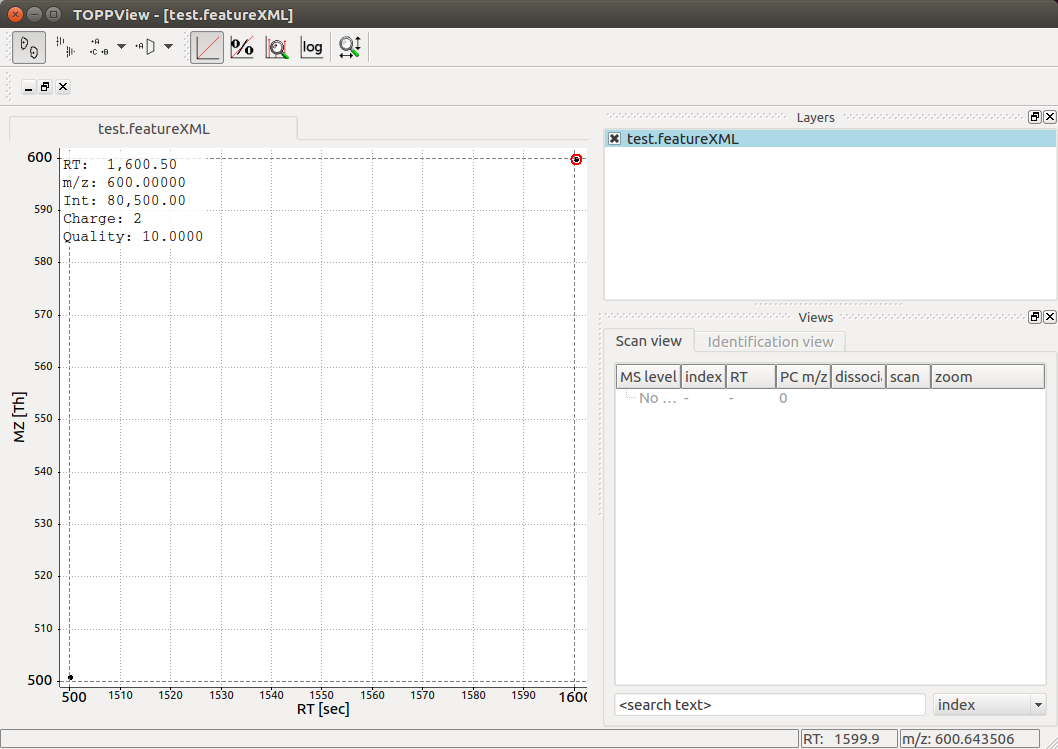

In the above example, only two features are present. In a typical
[LC-MS/MS](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-LC-MS/MS)
experiment, you can expect thousands of features.

## [Feature Maps](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-feature-maps)

The resulting
[FeatureMap](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureMap.html)
can be used in various ways to extract quantitative data directly and it
supports direct iteration in Python:

In [ ]:
fmap = oms.FeatureMap()
oms.FeatureXMLFile().load("test.featureXML", fmap)
for feature in fmap:
    print("Feature: ", feature.getIntensity(), feature.getRT(), feature.getMZ())

## [Consensus Features](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-consensus-features)

Often
[LC-MS/MS](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-LC-MS/MS)
experiments are run to compare quantitative features across experiments.
In OpenMS, linked features from individual experiments are represented
by a
[ConsensusFeature](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.ConsensusFeature.html).
We will explore how
[Consensus Maps](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-consensus-maps)
are created in a process called FeatureLinking in the [Feature
Linking](feature_linking.ipynb) chapter. For now, we focus on how to
build :term:\`consensus feature\`s and their container (consensus maps)
manually.

In [ ]:
cf = oms.ConsensusFeature()
cf.setMZ(500.9)
cf.setCharge(2)
cf.setRT(1500.1)
cf.setIntensity(80500)

# Generate ConsensusFeature from features of two maps (with id 1 and 2)
### Feature 1
f_m1 = oms.ConsensusFeature()
f_m1.setRT(500)
f_m1.setMZ(300.01)
f_m1.setIntensity(200)
f_m1.ensureUniqueId()
### Feature 2
f_m2 = oms.ConsensusFeature()
f_m2.setRT(505)
f_m2.setMZ(299.99)
f_m2.setIntensity(600)
f_m2.ensureUniqueId()
cf.insert(1, f_m1)
cf.insert(2, f_m2)

We have thus added two features from two individual maps (which have the
unique identifier `1` and `2`) to the
[ConsensusFeature](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.ConsensusFeature.html).
Next, we inspect the
[consensus feature](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-consensus-feature),
compute a "consensus" m/z across the two maps and output the two linked
features:

In [ ]:
# The two features in map 1 and map 2 represent the same analyte at
# slightly different RT and m/z
for fh in cf.getFeatureList():
    print(fh.getMapIndex(), fh.getIntensity(), fh.getRT())

print(cf.getMZ())
cf.computeMonoisotopicConsensus()
print(cf.getMZ())

# Generate ConsensusMap and add two maps (with id 1 and 2)
cmap = oms.ConsensusMap()
fds = {1: oms.ColumnHeader(), 2: oms.ColumnHeader()}
fds[1].filename = "file1"
fds[2].filename = "file2"
cmap.setColumnHeaders(fds)

cf.ensureUniqueId()
cmap.push_back(cf)
oms.ConsensusXMLFile().store("test.consensusXML", cmap)

Inspection of the generated `test.consensusXML` reveals that it contains
references to two
[LC-MS/MS](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-LC-MS/MS)
runs (`file1` and `file2`) with their respective unique identifier. Note
how the two features we added before have matching unique identifiers.

Visualization of the resulting output file reveals a single
[ConsensusFeature](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.ConsensusFeature.html)
of size 2 that links to the two individual features at their respective
positions in RT and m/z:

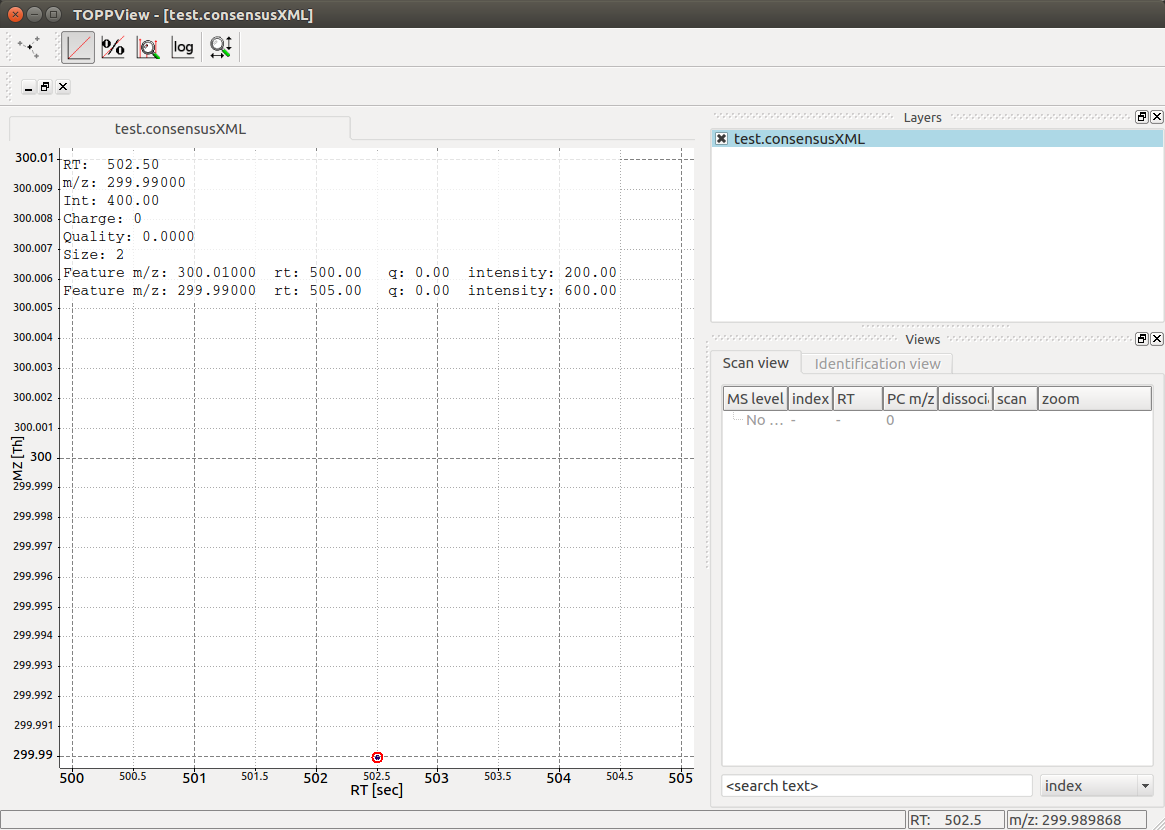

## [Consensus Maps](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-consensus-maps)

The resulting
[ConsensusMap](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.ConsensusMap.html)
can be used in various ways to extract quantitative data directly and it
supports direct iteration in Python:

In [ ]:
cmap = oms.ConsensusMap()
oms.ConsensusXMLFile().load("test.consensusXML", cmap)
for cfeature in cmap:
    cfeature.computeConsensus()
    print(
        "ConsensusFeature",
        cfeature.getIntensity(),
        cfeature.getRT(),
        cfeature.getMZ(),
    )
    # The two features in map 1 and map 2 represent the same analyte at
    # slightly different RT and m/z
    for fh in cfeature.getFeatureList():
        print(" -- Feature", fh.getMapIndex(), fh.getIntensity(), fh.getRT())